In [1]:
from tqdm import trange
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pickle.load(open('cifar-10-batches-py/data_batch_1', 'rb'), encoding='bytes')
features = data[b'data'].astype(float)
labels = np.array(data[b'labels'])

N, D = 1000, 10
features = features[:N]
labels = labels[:N]
features = np.dot(features, np.random.randn(features.shape[1], D))
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

In [3]:
def accuracy(weights):
    scores = np.dot(features, weights)
    predictions = np.argmax(scores, axis=1)
    return np.equal(predictions, labels).sum() / predictions.size

In [4]:
def softmax(weights):
    scores = np.dot(features, weights)
    exp_norm_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = np.choose(labels, exp_norm_scores.T) / np.sum(exp_norm_scores, axis=1)
    loss = -np.log(probs)
    return np.sum(loss) / loss.size

In [5]:
def gradient(loss, weights, delta=1e-6):
    grad = np.zeros(weights.shape)
    base_loss = loss(weights)
    for i, w_i in enumerate(weights):
        for j, w_ij in enumerate(w_i):
            weights[i, j] = w_ij + delta
            grad[i, j] = (loss(weights) - base_loss) / delta
            weights[i, j] = w_ij
    return grad

In [6]:
def train(num_epochs=1000, alpha=1e-1):
    weights = np.random.randn(features.shape[1], len(set(labels)))
    for _ in trange(num_epochs):
        weights -= alpha * gradient(softmax, weights)
        yield softmax(weights), accuracy(weights)

In [7]:
loss, acc = zip(*train())

100%|██████████| 1000/1000 [00:31<00:00, 33.49it/s]


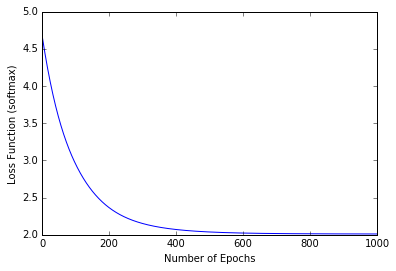

In [8]:
plt.plot(loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Function (softmax)')
plt.show()

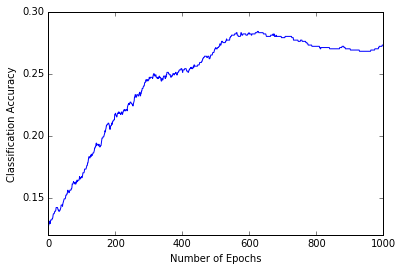

In [9]:
plt.plot(acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Classification Accuracy')
plt.show()